In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018_2023-Model.csv')
df.head()

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,BROOKLYN,11234,40.628770,-73.91825,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False
1,2018-01-01 00:05:00,BROOKLYN,11211,40.718460,-73.95281,0,0,Failure to Yield Right-of-Way,3818641,Sedan,Moving Violation,Winter,Late Night,False
2,2018-01-01 00:15:00,BROOKLYN,11236,40.645176,-73.90622,0,0,Unsafe Speed,3824618,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False
3,2018-01-01 00:30:00,BROOKLYN,11211,40.716805,-73.95460,0,0,Driver Inattention/Distraction,3818640,Taxi,Driver Inattention,Winter,Late Night,False
4,2018-01-01 01:10:00,QUEENS,11385,40.695526,-73.90395,0,0,Traffic Control Disregarded,3819354,Sedan,Moving Violation,Winter,Late Night,False


In [3]:
# Create a new column 'IF NIGHT' based on whether 'Night' appears in the 'TIME OF DAY' column
df['IF NIGHT'] = df['TIME OF DAY'].apply(lambda x: True if x == 'Night' else False)
df.head()

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR,IF NIGHT
0,2018-01-01 00:00:00,BROOKLYN,11234,40.628770,-73.91825,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False,False
1,2018-01-01 00:05:00,BROOKLYN,11211,40.718460,-73.95281,0,0,Failure to Yield Right-of-Way,3818641,Sedan,Moving Violation,Winter,Late Night,False,False
2,2018-01-01 00:15:00,BROOKLYN,11236,40.645176,-73.90622,0,0,Unsafe Speed,3824618,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False,False
3,2018-01-01 00:30:00,BROOKLYN,11211,40.716805,-73.95460,0,0,Driver Inattention/Distraction,3818640,Taxi,Driver Inattention,Winter,Late Night,False,False
4,2018-01-01 01:10:00,QUEENS,11385,40.695526,-73.90395,0,0,Traffic Control Disregarded,3819354,Sedan,Moving Violation,Winter,Late Night,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42108 entries, 0 to 42107
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE TIME                42108 non-null  object 
 1   BOROUGH                        42108 non-null  object 
 2   ZIP CODE                       42108 non-null  int64  
 3   LATITUDE                       42108 non-null  float64
 4   LONGITUDE                      42108 non-null  float64
 5   NUMBER OF PERSONS INJURED      42108 non-null  int64  
 6   NUMBER OF PERSONS KILLED       42108 non-null  int64  
 7   CONTRIBUTING FACTOR VEHICLE 1  42108 non-null  object 
 8   COLLISION_ID                   42108 non-null  int64  
 9   VEHICLE TYPE CODE 1            42108 non-null  object 
 10  CONTRIBUTING CATEGORY V1       42108 non-null  object 
 11  SEASON                         42108 non-null  object 
 12  TIME OF DAY                    42108 non-null 

#### Changing DateTime Index

In [5]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])

In [6]:
#Set to datetime index
#df.set_index('CRASH DATE TIME', inplace=True)

In [7]:
#Review the contributing factors
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(sort=True).head()

Driver Inattention/Distraction    16267
Failure to Yield Right-of-Way      5564
Following Too Closely              3870
Backing Unsafely                   3096
Passing Too Closely                2954
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [8]:
df['CONTRIBUTING CATEGORY V1'].value_counts()

Moving Violation      23658
Driver Inattention    18450
Name: CONTRIBUTING CATEGORY V1, dtype: int64

In [9]:
df['CONTRIBUTING CATEGORY V1'] == 'Moving Violation'

0         True
1         True
2         True
3        False
4         True
         ...  
42103    False
42104    False
42105    False
42106    False
42107    False
Name: CONTRIBUTING CATEGORY V1, Length: 42108, dtype: bool

In [10]:
mv_de = df.loc[df['CONTRIBUTING CATEGORY V1'].isin(['Moving Violation', 'Driver Error'])]
mv_de

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR,IF NIGHT
0,2018-01-01 00:00:00,BROOKLYN,11234,40.628770,-73.91825,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False,False
1,2018-01-01 00:05:00,BROOKLYN,11211,40.718460,-73.95281,0,0,Failure to Yield Right-of-Way,3818641,Sedan,Moving Violation,Winter,Late Night,False,False
2,2018-01-01 00:15:00,BROOKLYN,11236,40.645176,-73.90622,0,0,Unsafe Speed,3824618,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False,False
4,2018-01-01 01:10:00,QUEENS,11385,40.695526,-73.90395,0,0,Traffic Control Disregarded,3819354,Sedan,Moving Violation,Winter,Late Night,False,False
5,2018-01-01 01:30:00,QUEENS,11101,40.740913,-73.95226,0,0,Following Too Closely,3819375,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2022-12-31 00:13:00,BROOKLYN,11234,40.637420,-73.92401,0,0,Traffic Control Disregarded,4594450,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False,False
42096,2022-12-31 02:30:00,QUEENS,11385,40.706272,-73.86033,0,0,Passing Too Closely,4594663,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False,False
42097,2022-12-31 04:09:00,QUEENS,11368,40.758106,-73.85721,0,0,Unsafe Lane Changing,4594413,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Early Morning,False,False
42098,2022-12-31 04:14:00,BROOKLYN,11207,40.669937,-73.90019,0,0,Unsafe Speed,4594590,Sedan,Moving Violation,Winter,Early Morning,False,False


In [11]:
mv = df[df['CONTRIBUTING CATEGORY V1'] == 'Moving Violation']
de = df[df['CONTRIBUTING CATEGORY V1'] == 'Driver Error']

mv
de

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR,IF NIGHT


### Season

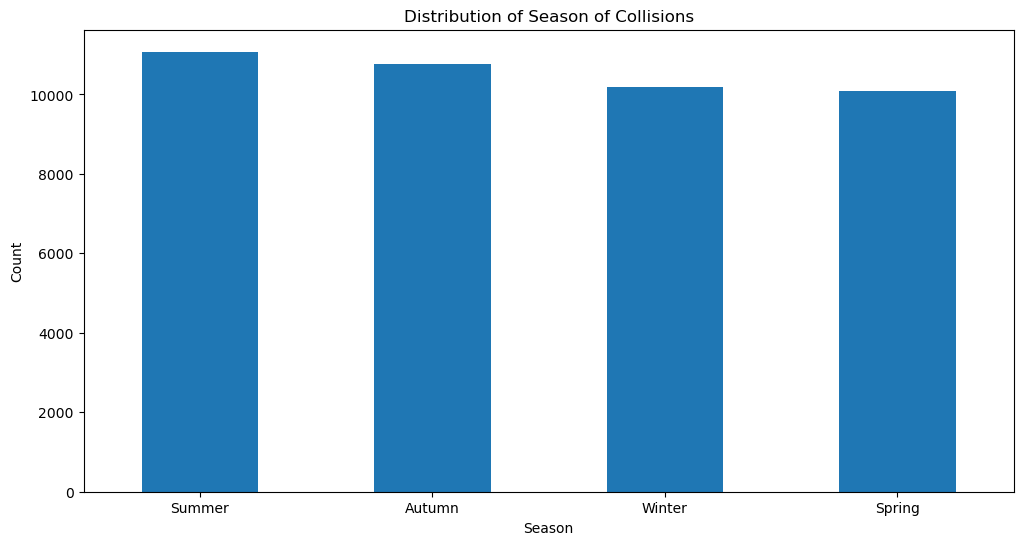

In [12]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(12,6))

df['SEASON'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Season');
ax.set_ylabel('Count')
ax.set_title('Distribution of Season of Collisions')
ax.tick_params(axis='x', labelrotation=0);

### Time of Day

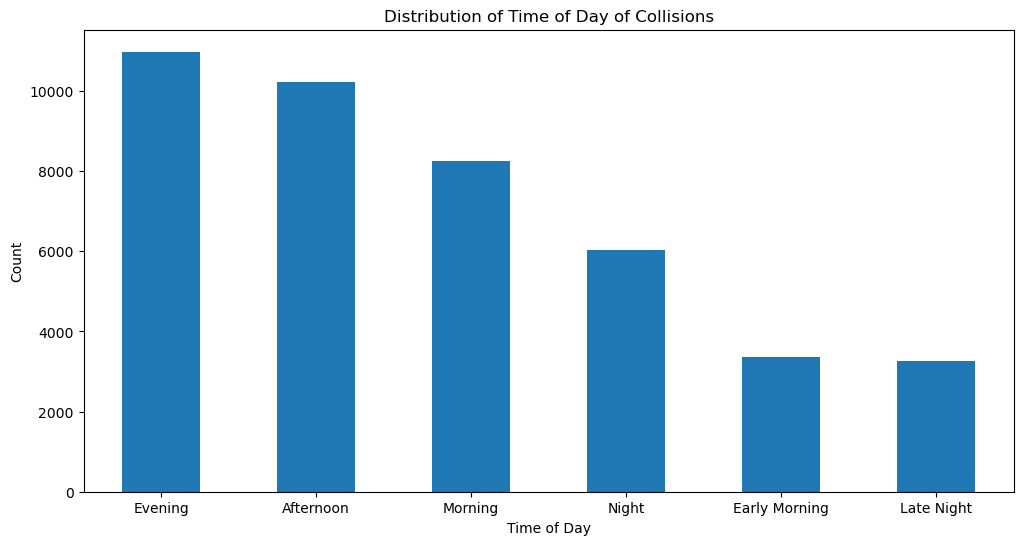

In [13]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(12,6))

df['TIME OF DAY'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Time of Day');
ax.set_ylabel('Count')
ax.set_title('Distribution of Time of Day of Collisions')
ax.tick_params(axis='x', labelrotation=0);

### Rush Hour

In [14]:
df['IS RUSH HOUR'].value_counts()

False    28020
True     14088
Name: IS RUSH HOUR, dtype: int64

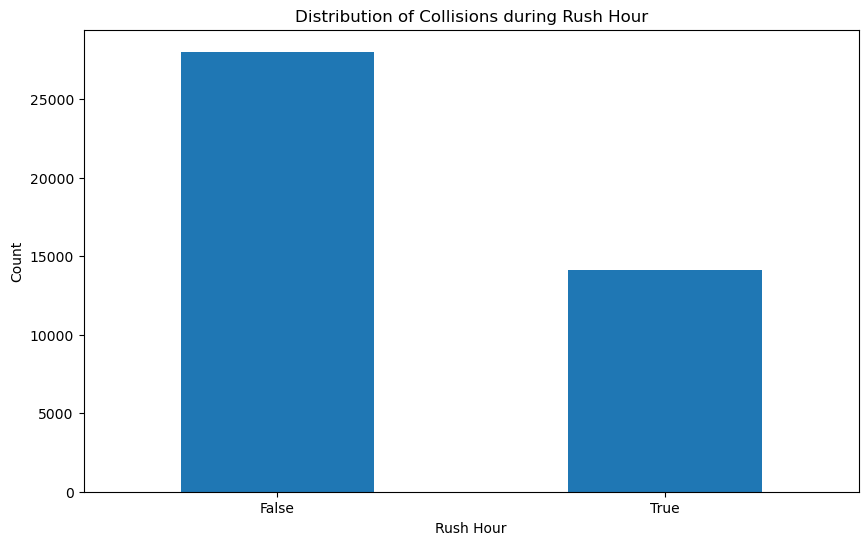

In [15]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(10,6))

df['IS RUSH HOUR'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('Rush Hour');
ax.set_ylabel('Count')
ax.set_title('Distribution of Collisions during Rush Hour')
ax.tick_params(axis='x', labelrotation=0);

## Zip Code

In [16]:
df['ZIP CODE'].value_counts().head(10)

11207    5805
11101    4618
11234    4428
11385    4135
11236    4038
11211    3951
11368    3900
11206    3838
11201    3700
11373    3695
Name: ZIP CODE, dtype: int64

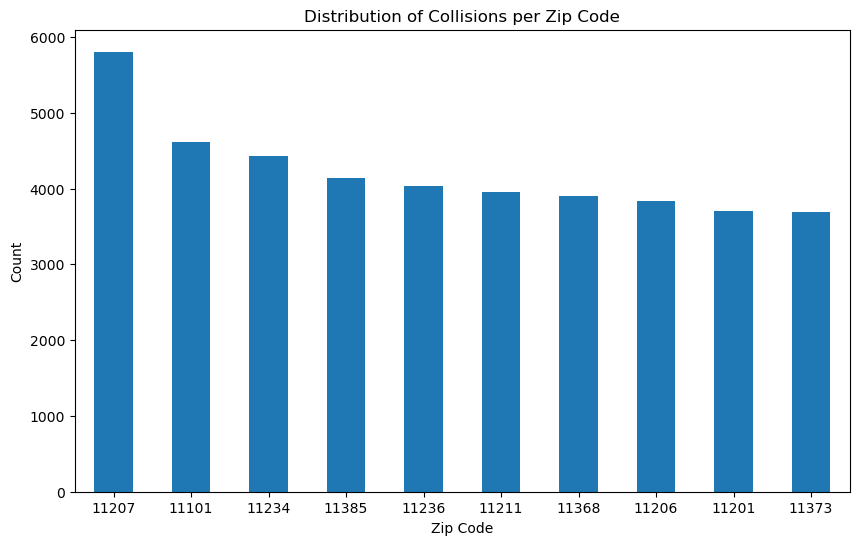

In [17]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(10,6))

df['ZIP CODE'].value_counts().head(10).plot(kind='bar')

# Customize appearance
ax.set_xlabel('Zip Code');
ax.set_ylabel('Count')
ax.set_title('Distribution of Collisions per Zip Code')
ax.tick_params(axis='x', labelrotation=0);

In [18]:
##Total number of collisions by zip code
#Group  by Zip Code, and sum the number of accidents for Zip Code
total_accidents_by_zipcode = df.groupby('ZIP CODE')['COLLISION_ID'].count()

#Create dataframe for easier viewing
total_accidents_by_zipcode = pd.DataFrame(total_accidents_by_zipcode)

#Rename column
total_accidents_by_zipcode.rename(columns = {'COLLISION_ID':'NUMBER OF COLLISIONS'}, inplace = True)

##Total number of injuries by zip code 
# Group by Zip Code, and sum the number of persons injured
injured = df.groupby(['ZIP CODE'])[['NUMBER OF PERSONS INJURED']].sum()

##Merge the two dataframes
injury_collision = total_accidents_by_zipcode.merge(injured, on='ZIP CODE')

#Create new column with injury to total number of collisions ratio
injury_collision['INJURY/COLLISION TOTAL RATIO'] = injury_collision['NUMBER OF PERSONS INJURED'] / injury_collision['NUMBER OF COLLISIONS']

#Create new column converting ratio to percentage
injury_collision['INJURY/COLLISION TOTAL PERCENTAGE'] = round(injury_collision['INJURY/COLLISION TOTAL RATIO'] * 100)

#Sort by descending percentage
injury_collision.sort_values(by='INJURY/COLLISION TOTAL PERCENTAGE', ascending=False)

,NUMBER OF COLLISIONS,NUMBER OF PERSONS INJURED,INJURY/COLLISION TOTAL RATIO,INJURY/COLLISION TOTAL PERCENTAGE
ZIP CODE,,,,
11236,4038,2060,0.510154,51.0
11207,5805,2565,0.441860,44.0
11234,4428,1918,0.433153,43.0
11368,3900,1378,0.353333,35.0
11385,4135,1409,0.340750,34.0
11206,3838,1267,0.330120,33.0
11101,4618,1405,0.304244,30.0
11211,3951,1147,0.290306,29.0
11373,3695,1044,0.282544,28.0


In [19]:
injured2 = injured.copy()
injured2 = injured2.sort_values(by='NUMBER OF PERSONS INJURED', ascending=False)
injured2.head()

,NUMBER OF PERSONS INJURED
ZIP CODE,
11207,2565
11236,2060
11234,1918
11385,1409
11101,1405


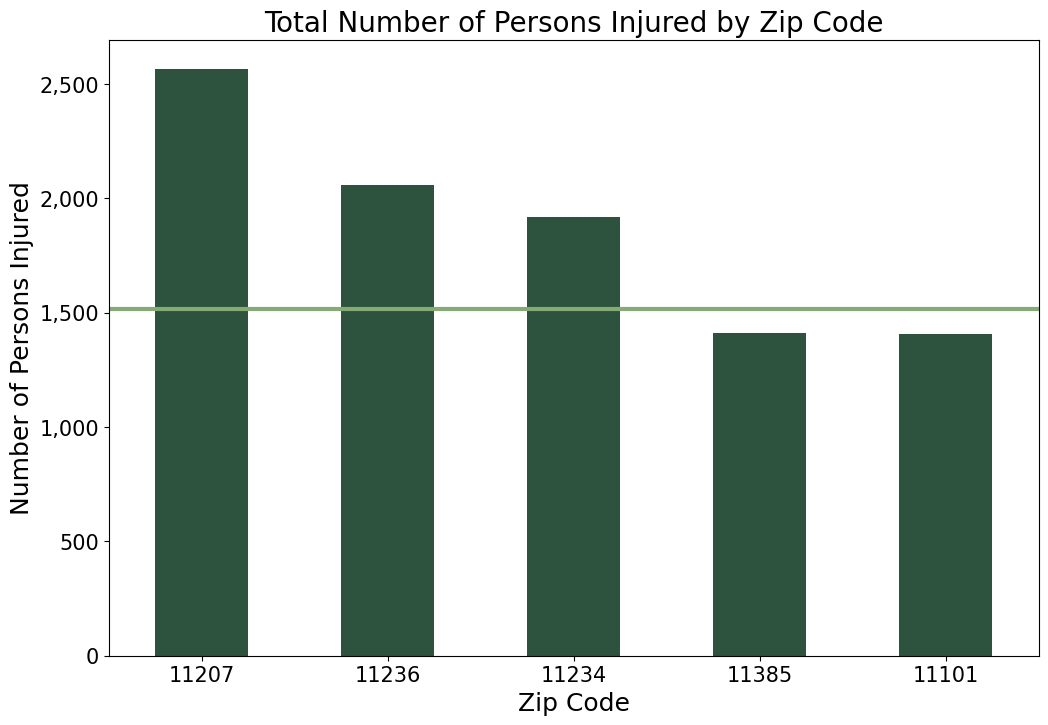

In [27]:
#Plot bar chart of injuries
ax = injured2.head().plot(kind='bar', figsize=(12, 8), color='#2d523d', legend=False)

#Customize appearance
ax.set_title('Total Number of Persons Injured by Zip Code', fontsize = 20)
ax.set_xlabel('Zip Code', fontsize = 18)
ax.set_ylabel('Number of Persons Injured', fontsize = 18)

ax.tick_params(axis='both', which='major', labelsize=15, labelrotation=0)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

ax.axhline(y=injured['NUMBER OF PERSONS INJURED'].mean(), color='#85aa76ff', linewidth=3);

#Show the plot
plt.show()

#Export plot
fig.savefig('images/Top5TotalInjuriesByZipCode', transparent=True)

### Contributing Factor Graphs

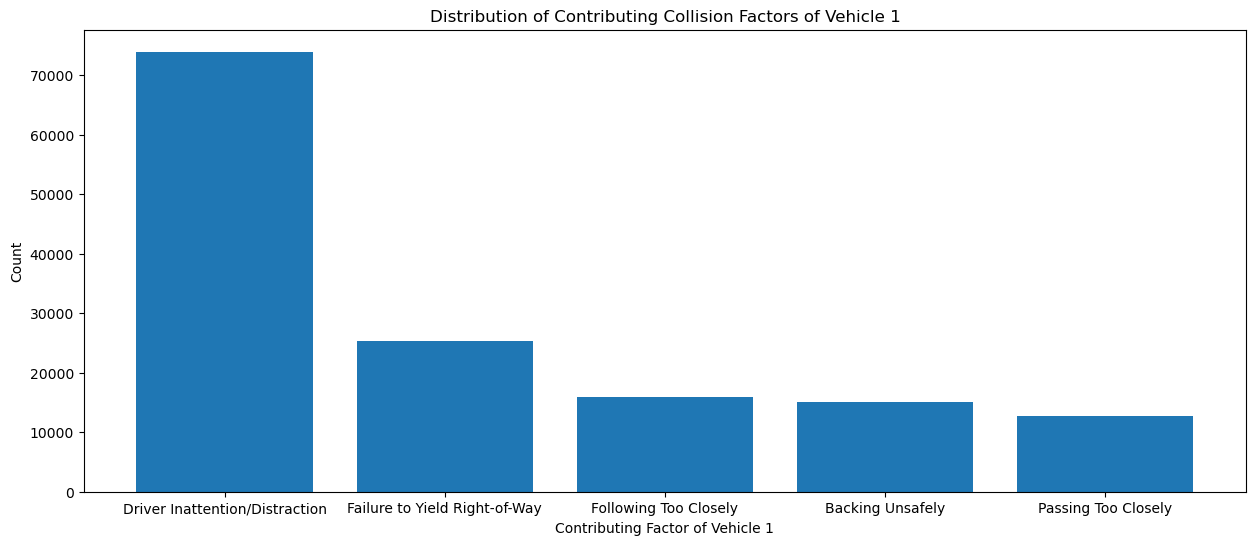

In [18]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
causes_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:5]

# Plot bar chart 
ax.bar(causes_counts.index, causes_counts.values)

# Customize appearance
ax.set_xlabel('Contributing Factor of Vehicle 1');
ax.set_ylabel('Count')
ax.set_title('Distribution of Contributing Collision Factors of Vehicle 1');

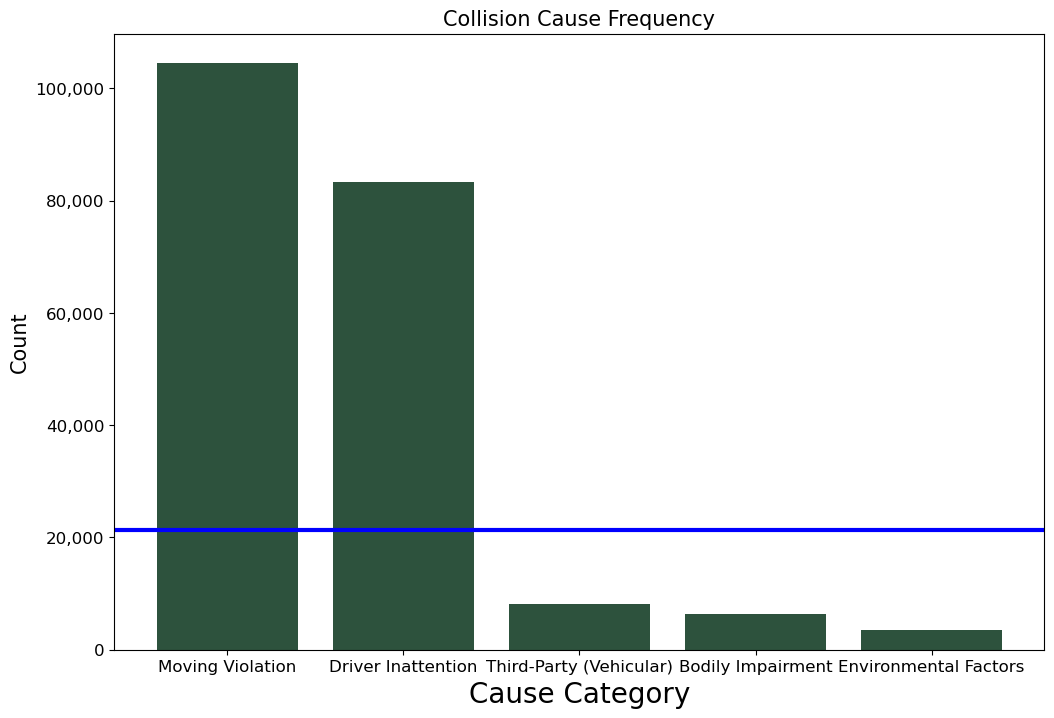

In [19]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(12,8))

# Create variable for easier reuse
category_counts = df['CONTRIBUTING CATEGORY V1'].value_counts()[:5]

# Plot bar chart 
ax.bar(category_counts.index, category_counts.values,color='#2d523d')

# Customize appearance
ax.set_xlabel('Cause Category', fontsize = 20)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Collision Cause Frequency', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

ax.axhline(y=df['CONTRIBUTING CATEGORY V1'].value_counts().mean(), color='b', linewidth=3);

In [20]:
df['CONTRIBUTING CATEGORY V1'].value_counts(normalize=True) * 100


Moving Violation               48.850731
Driver Inattention             38.962526
Third-Party (Vehicular)         3.794132
Bodily Impairment               2.956600
Environmental Factors           1.623185
Road Conditions                 1.148335
Vehicle Defects                 1.085707
Third-Party (Non-Vehicular)     0.921659
Other Distractions              0.580010
Internal Electronics Usage      0.077116
Name: CONTRIBUTING CATEGORY V1, dtype: float64

In [21]:
df['CONTRIBUTING CATEGORY V1'].value_counts().mean()

21396.2

In [22]:
df['CONTRIBUTING CATEGORY V1'].value_counts().describe()

count        10.000000
mean      21396.200000
std       38631.405131
min         165.000000
25%        2059.750000
50%        2965.000000
75%        7670.000000
max      104522.000000
Name: CONTRIBUTING CATEGORY V1, dtype: float64

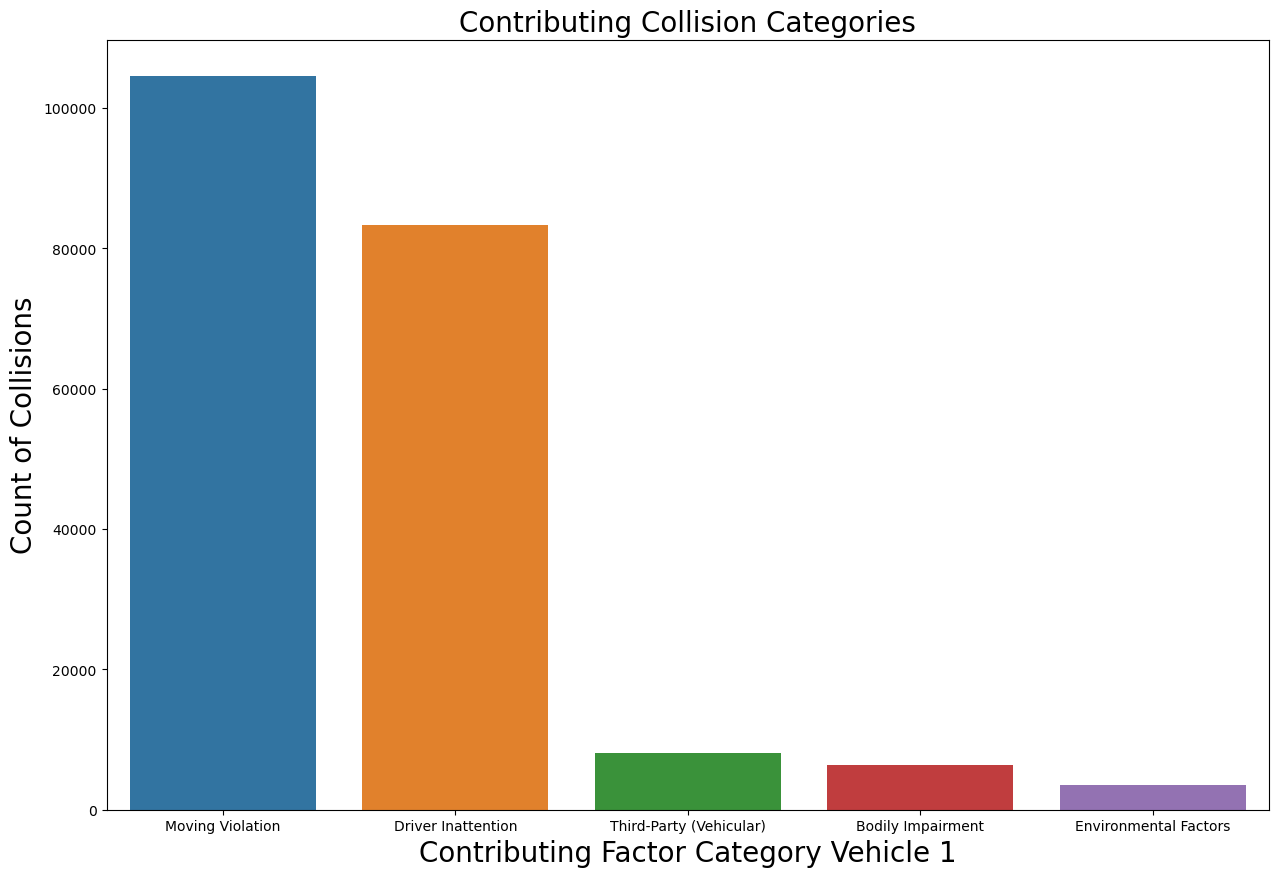

In [26]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=df['CONTRIBUTING CATEGORY V1'].value_counts()[:5].index, 
            y=df['CONTRIBUTING CATEGORY V1'].value_counts()[:5].values)
ax.set_xlabel('Contributing Factor Category Vehicle 1', fontsize = 20)
ax.set_ylabel('Count of Collisions', fontsize = 20)
ax.set_title('Contributing Collision Categories', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
#ax.set_xticklabels(['Average','Good', 'Very Good'])
#ax.tick_params(axis='both', which='major', labelsize=12);

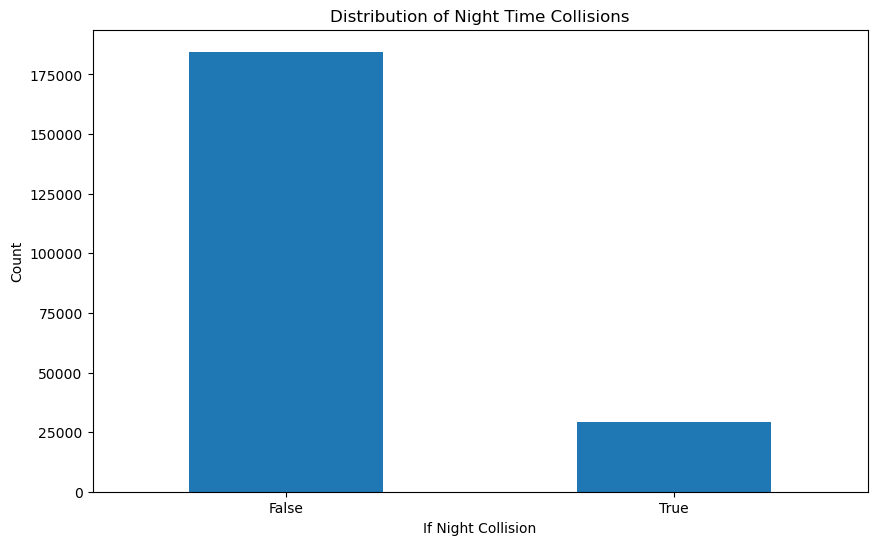

In [27]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(10,6))

df['IF NIGHT'].value_counts().plot(kind='bar')

# Customize appearance
ax.set_xlabel('If Night Collision');
ax.set_ylabel('Count')
ax.set_title('Distribution of Night Time Collisions')
ax.tick_params(axis='x', labelrotation=0);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE TIME                213962 non-null  datetime64[ns]
 1   BOROUGH                        213962 non-null  object        
 2   ZIP CODE                       213962 non-null  int64         
 3   LATITUDE                       213962 non-null  float64       
 4   LONGITUDE                      213962 non-null  float64       
 5   NUMBER OF PERSONS INJURED      213962 non-null  int64         
 6   NUMBER OF PERSONS KILLED       213962 non-null  int64         
 7   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object        
 8   COLLISION_ID                   213962 non-null  int64         
 9   VEHICLE TYPE CODE 1            213962 non-null  object        
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object        
 11  

In [29]:
#calculate sum of sales grouped by day
#df.groupby(df.DATETIME.dt.day)['CONTRIBUTING FACTOR VEHICLE 1'].sum()


### Group by

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE TIME                213962 non-null  datetime64[ns]
 1   BOROUGH                        213962 non-null  object        
 2   ZIP CODE                       213962 non-null  int64         
 3   LATITUDE                       213962 non-null  float64       
 4   LONGITUDE                      213962 non-null  float64       
 5   NUMBER OF PERSONS INJURED      213962 non-null  int64         
 6   NUMBER OF PERSONS KILLED       213962 non-null  int64         
 7   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object        
 8   COLLISION_ID                   213962 non-null  int64         
 9   VEHICLE TYPE CODE 1            213962 non-null  object        
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object        
 11  

In [31]:
#Group the values by day and count the number of instances of each value
v1_cat_count = df.groupby([df['CRASH DATE TIME'].dt.date, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Print the result
print(v1_cat_count)

      CRASH DATE TIME CONTRIBUTING CATEGORY V1  count
0          2018-01-01        Bodily Impairment      4
1          2018-01-01       Driver Inattention     45
2          2018-01-01    Environmental Factors      2
3          2018-01-01         Moving Violation     72
4          2018-01-01       Other Distractions      2
...               ...                      ...    ...
12954      2022-12-31        Bodily Impairment      6
12955      2022-12-31       Driver Inattention     29
12956      2022-12-31    Environmental Factors      4
12957      2022-12-31         Moving Violation     34
12958      2022-12-31  Third-Party (Vehicular)      2

[12959 rows x 3 columns]


In [32]:
#Create pivot table of daily cause categories
pivot_table = v1_cat_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
pivot_table

CONTRIBUTING CATEGORY V1,Bodily Impairment,Driver Inattention,Environmental Factors,Internal Electronics Usage,Moving Violation,Other Distractions,Road Conditions,Third-Party (Non-Vehicular),Third-Party (Vehicular),Vehicle Defects
CRASH DATE TIME,,,,,,,,,,
2018-01-01,4.0,45.0,2.0,0.0,72.0,2.0,5.0,0.0,5.0,1.0
2018-01-02,1.0,73.0,8.0,0.0,83.0,3.0,3.0,2.0,9.0,6.0
2018-01-03,3.0,86.0,2.0,1.0,105.0,1.0,0.0,3.0,8.0,1.0
2018-01-04,4.0,25.0,2.0,0.0,43.0,0.0,46.0,0.0,4.0,3.0
2018-01-05,2.0,53.0,4.0,0.0,114.0,0.0,45.0,0.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.0,15.0,0.0,0.0,27.0,0.0,0.0,1.0,2.0,0.0
2022-12-28,5.0,26.0,2.0,0.0,31.0,0.0,1.0,0.0,2.0,1.0
2022-12-29,1.0,15.0,0.0,0.0,29.0,1.0,1.0,0.0,2.0,0.0


In [33]:
#Change to a dataframe
daily_v1cat = pd.DataFrame(v1_cat_count)

#changing the index
daily_v1cat.set_index('CRASH DATE TIME', inplace=True)#changing the index

daily_v1cat

,CONTRIBUTING CATEGORY V1,count
CRASH DATE TIME,,
2018-01-01,Bodily Impairment,4
2018-01-01,Driver Inattention,45
2018-01-01,Environmental Factors,2
2018-01-01,Moving Violation,72
2018-01-01,Other Distractions,2
...,...,...
2022-12-31,Bodily Impairment,6
2022-12-31,Driver Inattention,29
2022-12-31,Environmental Factors,4


In [ ]:
# create a pivot table to reshape the data for plotting
pivot_table = v1_cat_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)

# create a bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True)

# display the chart
plt.show()

In [ ]:
#Group the values by year and count the number of instances of each value
v1_cat_yearcount = df.groupby([df['CRASH DATE TIME'].dt.year, 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

#Create pivot table of daily cause categories
yearly_cat_pivt = v1_cat_yearcount.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
yearly_cat_pivt

In [ ]:
# Set up plots
#fig, ax = plt.subplots(figsize=(13, 6))

# create a bar chart of the pivot table
yearly_cat_pivt.plot(kind='bar', stacked=True)

#Legend
plt.legend(loc='upper right', fontsize='x-small')
plt.tight_layout()

# display the chart
plt.show();

In [ ]:
#fig, ax = plt.subplots(figsize=(15, 8))


#Create a bar chart of the pivot table
yearly_cat_pivt.plot(kind='bar')

#Legend
plt.legend(loc='upper right', fontsize='x-small')
plt.tight_layout()

#Rotate x-axis ticks
plt.tick_params(axis='x', labelrotation=0)

#Display the chart
plt.show();

### Vehicle Type

In [ ]:
# Set up plots
fig, (ax) = plt.subplots(figsize=(15,6))

# Create variable for easier reuse
V1type_count = df['VEHICLE TYPE CODE 1'].value_counts()[:5]

# Plot bar chart 
ax.bar(V1type_count.index, V1type_count.values)

# Customize appearance
ax.set_xlabel('Vehicle 1 Type');
ax.set_ylabel('Count')
ax.set_title('Top 5 Type of Vehicle 1');

In [ ]:
#Group the values by day and count the number of instances of each value
mv_count = mv.groupby('ZIP CODE').size().reset_index(name='count')

#Print the result
mv_count

In [ ]:
mv

In [ ]:
import plotly.express as px

fig = px.choropleth(mv_count,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='value',
                    color_continuous_scale="Viridis_r",      
                    )
fig.update_layout(
      title_text = 'Mean Home Value by State, 1996 - 2018',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()